<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #6- Denysse Sevilla**

## Section 20.1: Numerical Differentiation Problem Statement

A **numerical grid** is a set of points over the domain of a function. If $x$ is the numerical grid then over some interval:

* $x_j$ is the $j^{th}$ point
* $h$ is the even spacing between $x_{j-1}$ and $x_j$

\
The value of a function $f(x)$ can be approximated using the numerical grid's **discrete** representation.

## Section 20.2: Finite Difference Approximating Derivatives

The derivative of a function $f(x)$ is a slope at point $x=a$. Using two points to create **finite difference** approximations, here are three methods used to estimate the slope of the function's derivative at point $x_j$:

* **Forward difference**: Using points $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$,

\
$f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}$

* **Backward difference**: Using points $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$,

\
$f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}$

* **Central difference**: Using points $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$,

\
$f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}$

\
The Taylor Series allows us to rewrite the formulas for approximating derivatives, where $h$ is the spacing, as follows:

* Forward difference formula:

$f'(x_j) ≈ \frac{f(x_{j+1}) - f(x_j)}{h}$,

* Backward difference formula:

$f'(x_j) ≈ \frac{f(x_j) - f(x_{j-1})}{h}$

* Central difference formula:

$f'(x_j) ≈ \frac{f(x_{j+1}) - f(x_{j-1})}{2h}$

\
In general, formulas that use symmentric points around $x_j$, such as the central difference formula, are more accurate compared to asymmetric ones, such as forward/backward difference formulas.

\
Below is an example that demonstrates the accuracy of each method:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

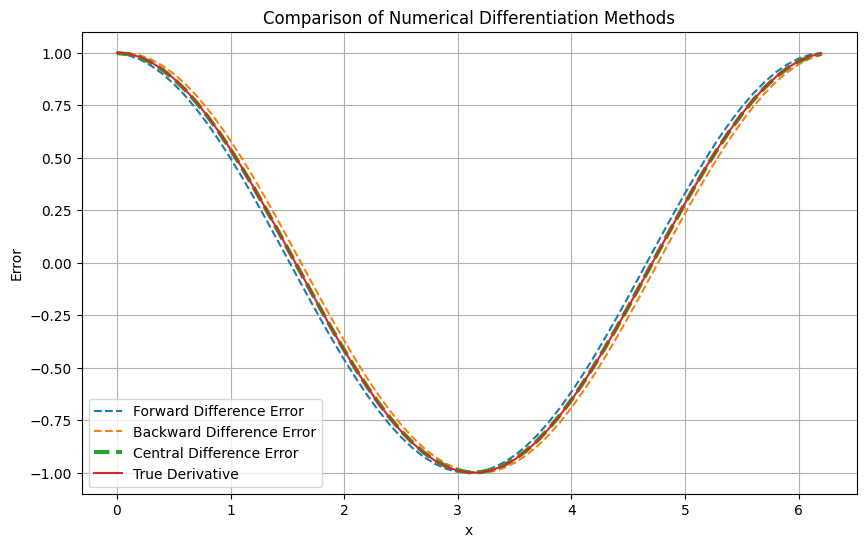

Forward difference max error:
0.04997515074549206
Backward difference max error:
0.04998568667579546
Central difference max error:
0.0016658335317184525


In [ ]:
# Step 3: Set up the range of x values and step size
h = 0.1
x = np.arange(0, 2*np.pi, h)


# compute corresponding grid
#x_diff = x[:-1:]

# Define the function and its true derivative
def func(x):
    return np.sin(x)
def true_derivative(x):
    return np.cos(x)

#true_derivative = np.cos(x_diff)

# Implement the difference methods
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Calculate the approximations
fwd_diff = forward_difference(func, x, h)
bwd_diff = backward_difference(func, x, h)
ctr_diff = central_difference(func, x, h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, fwd_diff, '--', label='Forward Difference Error')
plt.plot(x, bwd_diff, '--', label='Backward Difference Error')
plt.plot(x, ctr_diff, '--', linewidth =3, label='Central Difference Error')
plt.plot(x, true_derivative(x), label='True Derivative')

plt.xlabel('x')
plt.ylabel('Error')
plt.title('Comparison of Numerical Differentiation Methods')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the max errors
error_fwd = max(abs(true_derivative(x) - fwd_diff))
error_bwd = max(abs(true_derivative(x) - bwd_diff))
error_ctr = max(abs(true_derivative(x) - ctr_diff))

print("Forward difference max error:")
print(error_fwd)

print("Backward difference max error:" )
print(error_bwd)

print("Central difference max error:")
print(error_ctr)



As shown, the central difference method is the most accurate!

## Section 20.3: Approximating of Higher Order Derivatives

The Taylor series also allows us to approximate higher order derivatives.

\
Ex: Computing $x=x_{j-1}$ and $x_{j+1}$ around $a=x_j$ using the Taylor series gives

$f''(x_j) ≈ \frac{f(x_{j+1} - 2f(x_j) + f(x_{j-1})}{h^2}$.

## Section 20.4: Numerical Differentiation with Noise

**Noise** contaminates the true value of a function, providing us with small errors that can be computed using pure math.

\
Ex: Given $f(x) = cos(x)$

and

$f_{ϵ,ω}(x) = cos(x) + ϵsin(ωx)$, where

* $0< ϵ << 1$ is a very small number
* $ω$ is large

it can be seen that $f≃f_{ϵ,ω}$


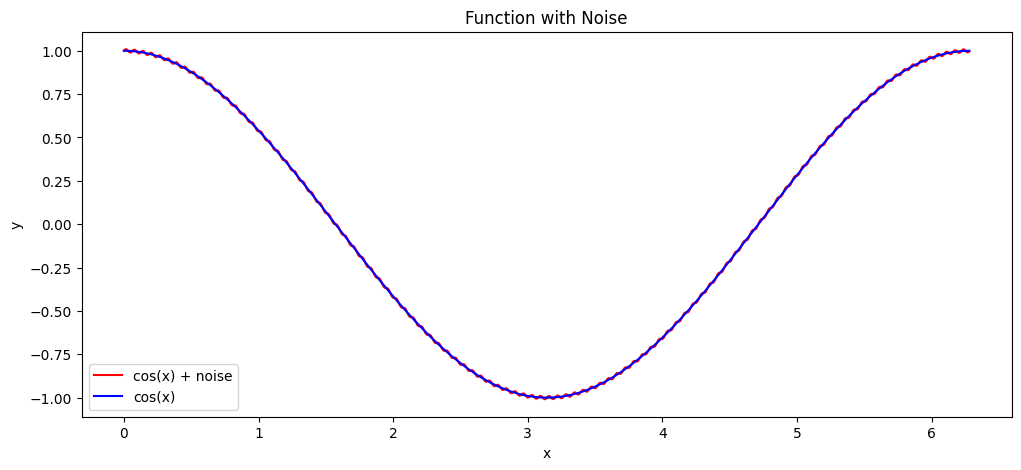

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 5))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')

plt.legend()
plt.show()

The derivatives of our functions are:

$f'(x) = -sin(x)$

and

$f'_{ϵ,ω}(x) = -sin(x) + ϵωcos(ωx)$

Notice how the noise on the derivative will no longer be small when ω is large.

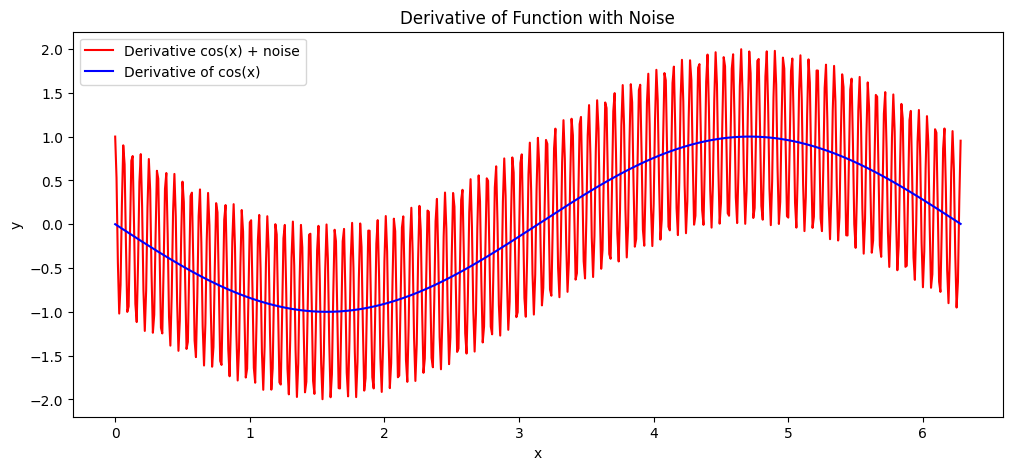

In [2]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 5))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Derivative of Function with Noise')

plt.legend()
plt.show()
